In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile

zip_path = "/content/brain_tumor_dataset.zip"
extract_path = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")



✅ Dataset extracted successfully!


In [ ]:
import os

zip_path = r"D:\Machine Learning\Model Deployment\brain_tumor_dataset.zip"
print("Exists?" , os.path.exists(zip_path))


Exists? False


In [ ]:
IMG_SIZE = 150
DATA_DIR = "/content/brain_tumor_dataset/Training"

In [ ]:
def load_data(data_dir):
    X = []
    y = []
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(label)
            except:
                continue
    return np.array(X), np.array(y)

X, y = load_data(DATA_DIR)

X = X / 255.0

In [ ]:
X.shape

(2870, 150, 150, 3)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

Training samples: 2296, Validation samples: 574


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,764 (18.42 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_val, y_val),
    batch_size=32
)

Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.5580 - loss: 1.9669 - val_accuracy: 0.4373 - val_loss: 2.0956
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6920 - loss: 0.7174 - val_accuracy: 0.2892 - val_loss: 4.7887
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7636 - loss: 0.5804 - val_accuracy: 0.2979 - val_loss: 3.9464
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7875 - loss: 0.4968 - val_accuracy: 0.3240 - val_loss: 5.4693
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8181 - loss: 0.4432 - val_accuracy: 0.5383 - val_loss: 2.8884
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8387 - loss: 0.3925 - val_accuracy: 0.7213 - val_loss: 1.1145
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8858 - loss: 0.2916 - val_accuracy: 0.6934 - val_loss: 0.9467
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9004 - loss: 0.2396 - val_accuracy: 0.6254 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8690 - loss: 0.5606

Test Loss: 0.5893
Test Accuracy: 0.8659


In [ ]:
import os

len(os.listdir("/content/brain_tumor_dataset/Training"))


4

Dense(3, activation='softmax')  →  Dense(4, activation='softmax')

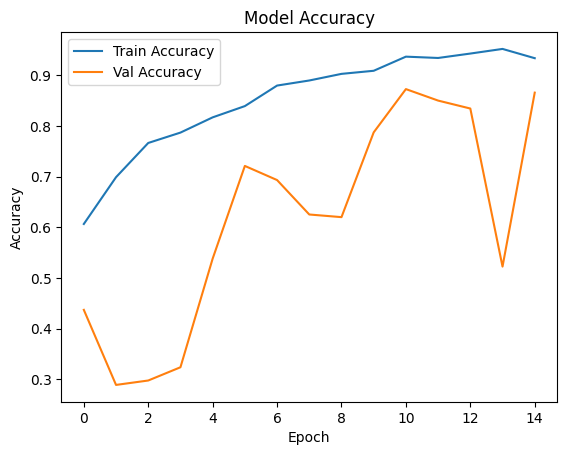

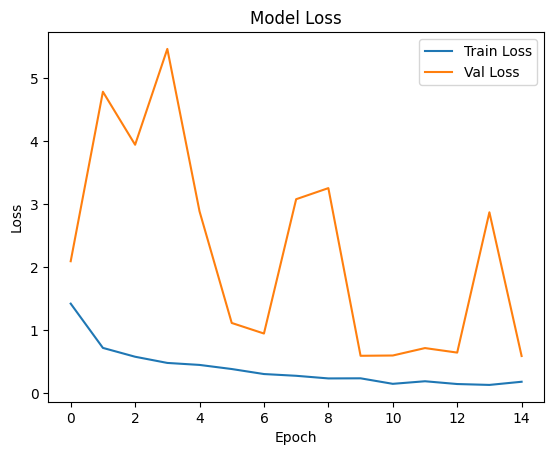

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']


In [ ]:
import numpy as np

# Get predicted class labels from model
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true class labels from one-hot encoded labels
y_true_labels = np.argmax(y_val, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


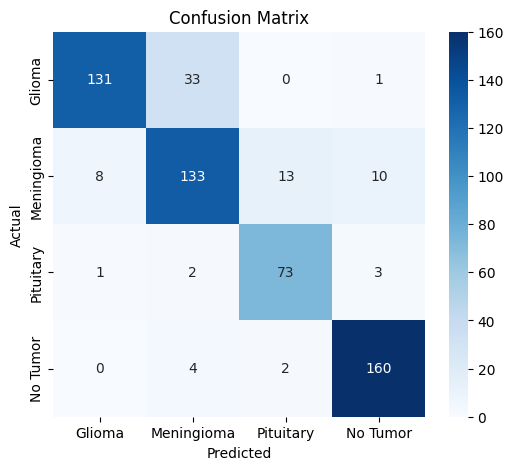

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

